# SECTION 5 - Advanced Visualization

## Categorical Data

In [1]:
#import Libraries
import pandas as pd

In [2]:
movies = pd.read_csv("Movie-Ratings.csv")

In [3]:
len(movies)

559

In [4]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
#Rename columns
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'YearofRelease']
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,YearofRelease
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   YearofRelease   559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
#Converting the columns datatypes to categories
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.YearofRelease = movies.YearofRelease.astype('category')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   YearofRelease   559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [10]:
#Unique values that categories hold
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [11]:
#Satistics Summary
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


## Working with JointPlots

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

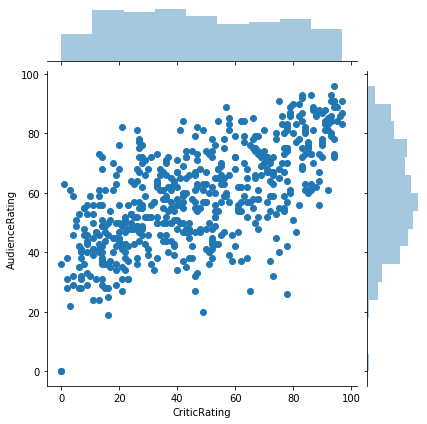

In [13]:
#Jointplots
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

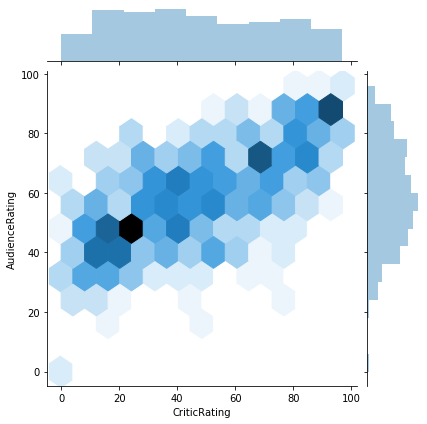

In [14]:
#Changing the style
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

---

## Histograms

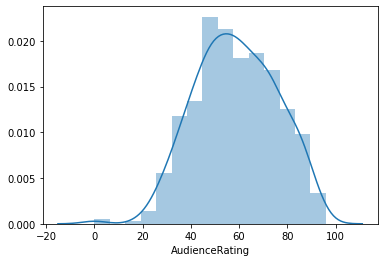

In [15]:
#Seaborn
m1 = sns.distplot(movies.AudienceRating, bins=15)

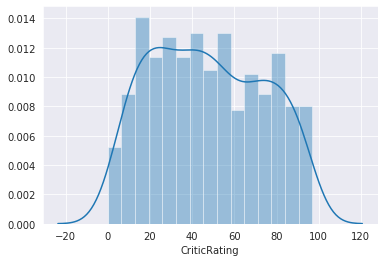

In [16]:
sns.set_style('darkgrid')
m1 = sns.distplot(movies.CriticRating, bins=15)

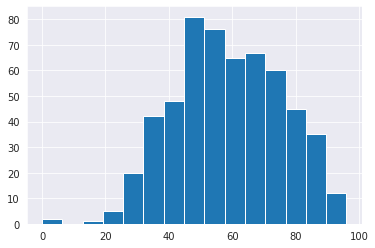

In [17]:
#Pyplot
n1 = plt.hist(movies.AudienceRating, bins=15)

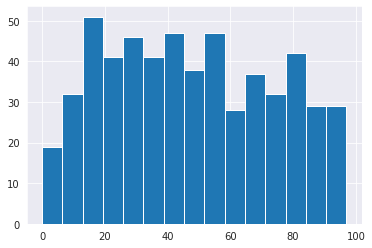

In [18]:
n1 = plt.hist(movies.CriticRating, bins=15)

### ---Stacked Histograms

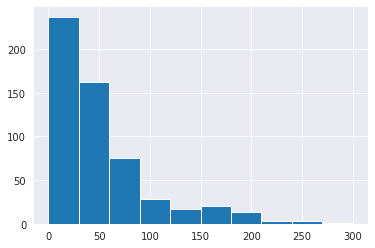

In [19]:
plt.hist(movies.BudgetMillions)
plt.show()

In [20]:
#movies from the drama genre
movies[movies.Genre == 'Drama']

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,YearofRelease
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


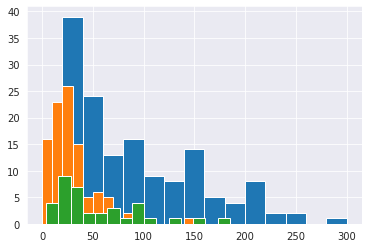

In [21]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

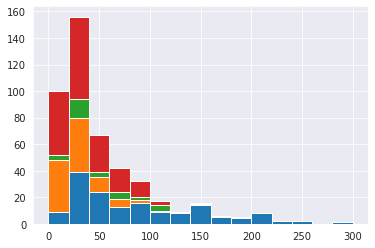

In [22]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions,
          movies[movies.Genre == 'Drama'].BudgetMillions,
          movies[movies.Genre == 'Thriller'].BudgetMillions,
          movies[movies.Genre == 'Comedy'].BudgetMillions],
          bins=15, stacked=True)
plt.show()

In [23]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


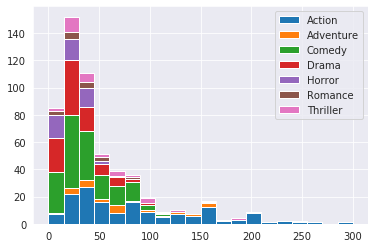

In [24]:
list1 = list() #empty list
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
h = plt.hist(list1, bins=20, stacked=True, rwidth=1, label=mylabels)
plt.legend()
plt.show()

---

## Creating KDE(Karnal Density Estimate) plot

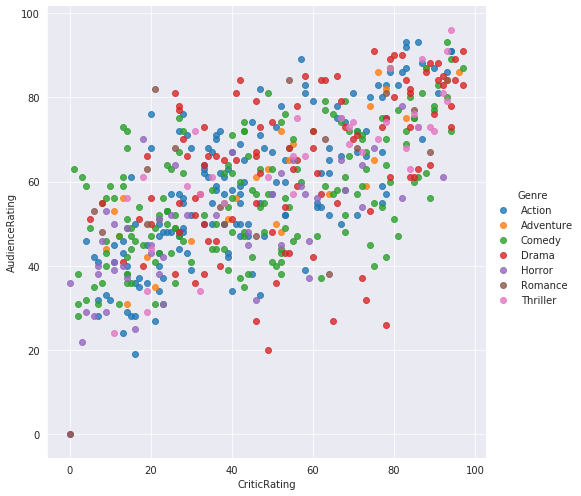

In [25]:
viz1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',
                 fit_reg=False, hue='Genre', height=7, aspect=1)

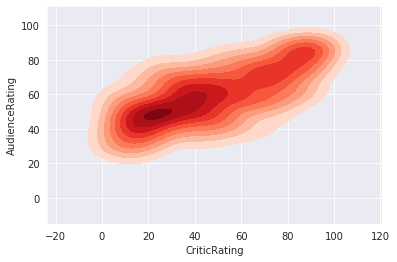

In [26]:
#KDE Plot
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating,
                shade=True, shade_lowest=False, cmap='Reds')

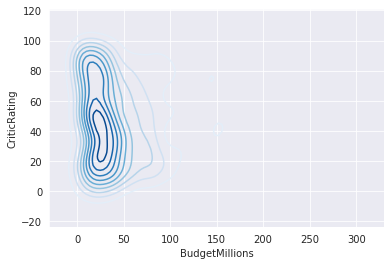

In [27]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='Blues')

---

### Working with Subplots()

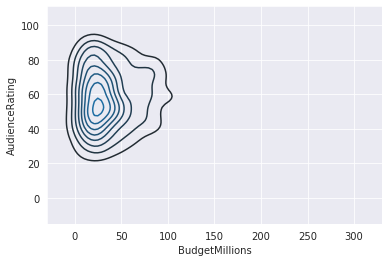

In [28]:
k3 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

[(-20, 160)]

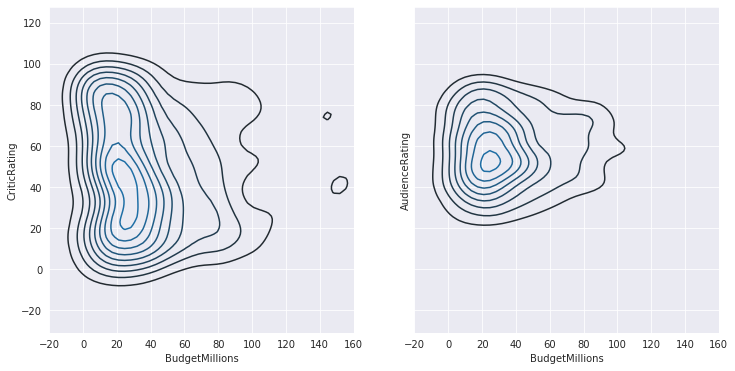

In [29]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0])
k3 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[1])
k2.set(xlim=(-20,160))

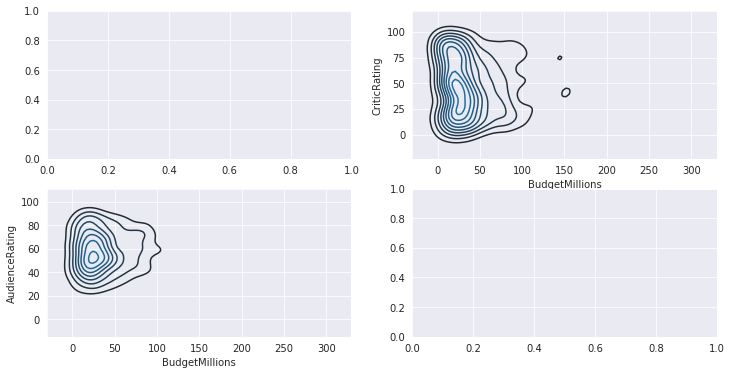

In [30]:
#2-dimensional set of subplots
f, axes = plt.subplots(2,2, figsize=(12,6))
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k3 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[1,0])


---

## ViolinPlots vs Boxplots

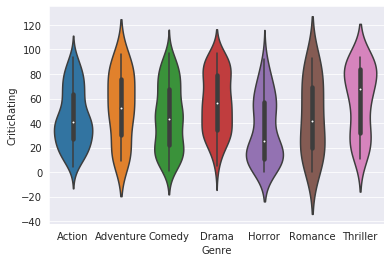

In [31]:
v = sns.violinplot(data=movies, x ='Genre', y='CriticRating')

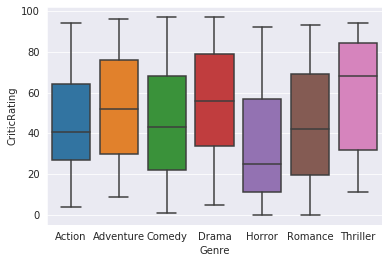

In [32]:
z = sns.boxplot(data=movies, x ='Genre', y='CriticRating')

[(-50, 150)]

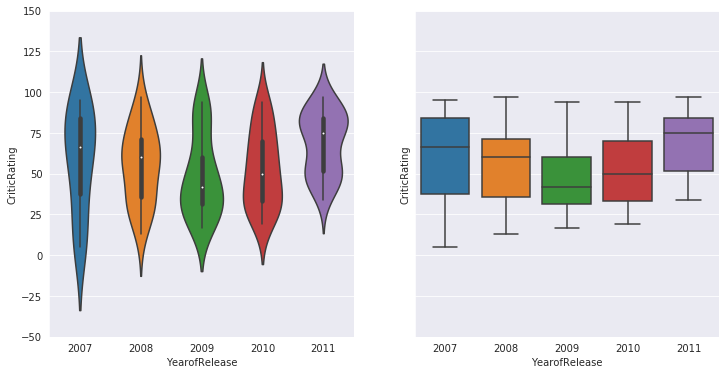

In [33]:
#Violinplot Vs Boxplot
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v = sns.violinplot(data=movies[movies.Genre=='Drama'], x ='YearofRelease', y='CriticRating', ax=axes[0])
z = sns.boxplot(data=movies[movies.Genre=='Drama'], x ='YearofRelease', y='CriticRating', ax=axes[1])
v.set(ylim=(-50,150))

---

## Creating a Facet Grid

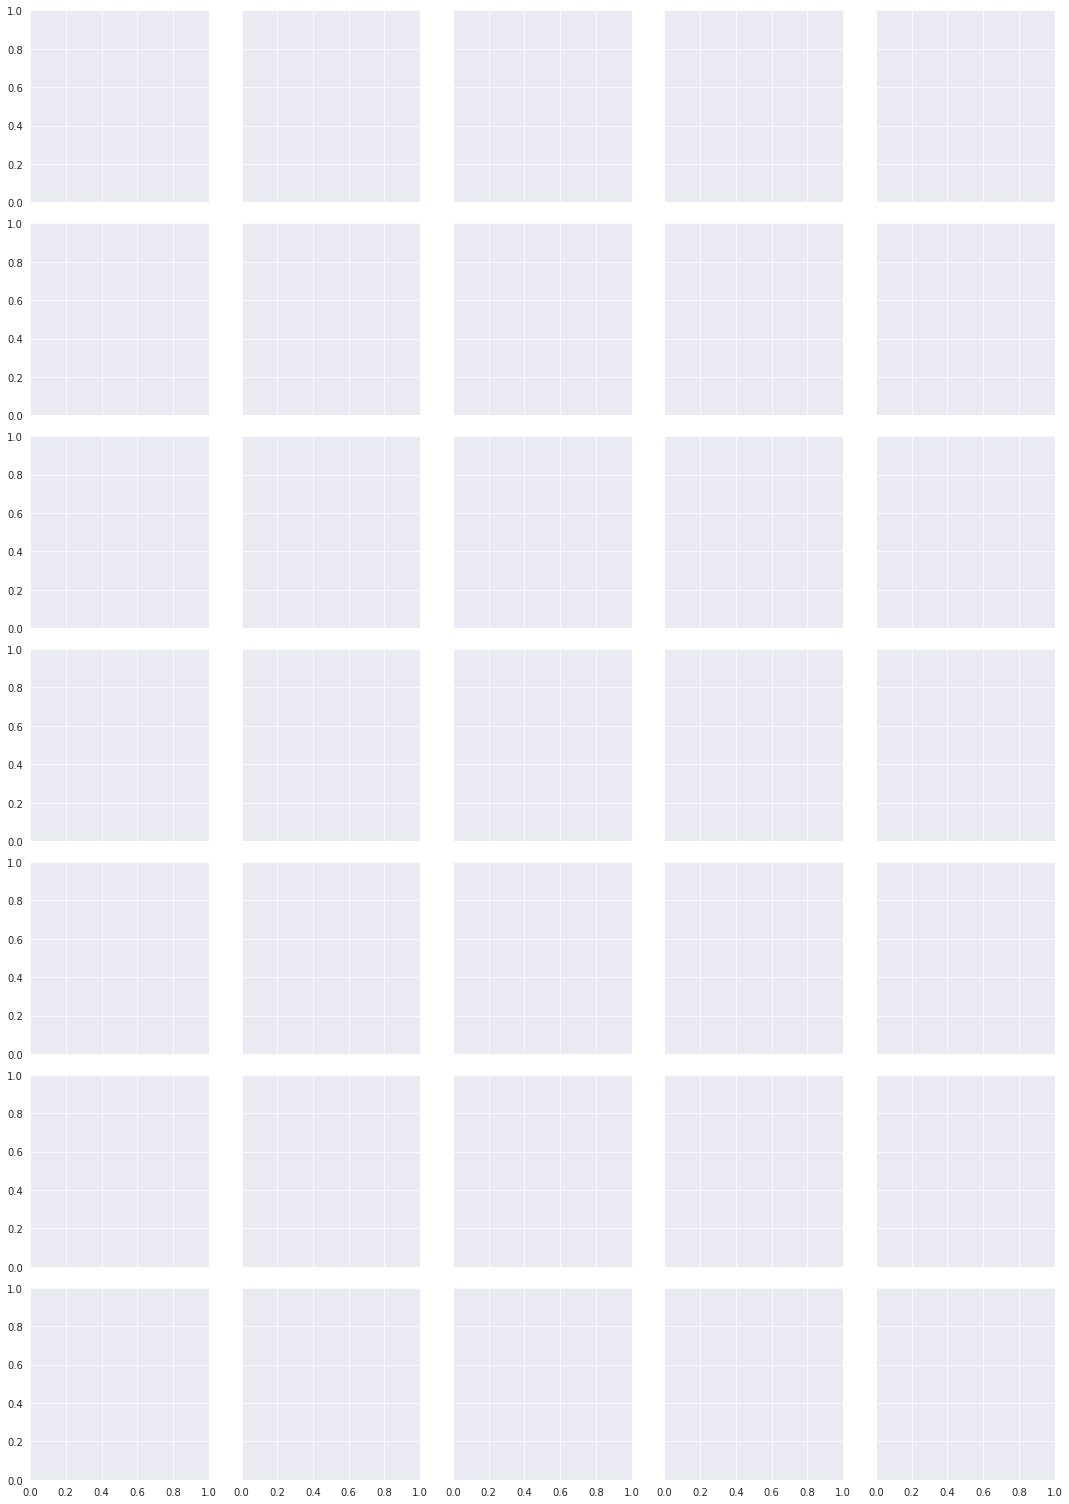

In [34]:
g = sns.FacetGrid(movies, row='Genre', col='YearofRelease', hue='Genre')

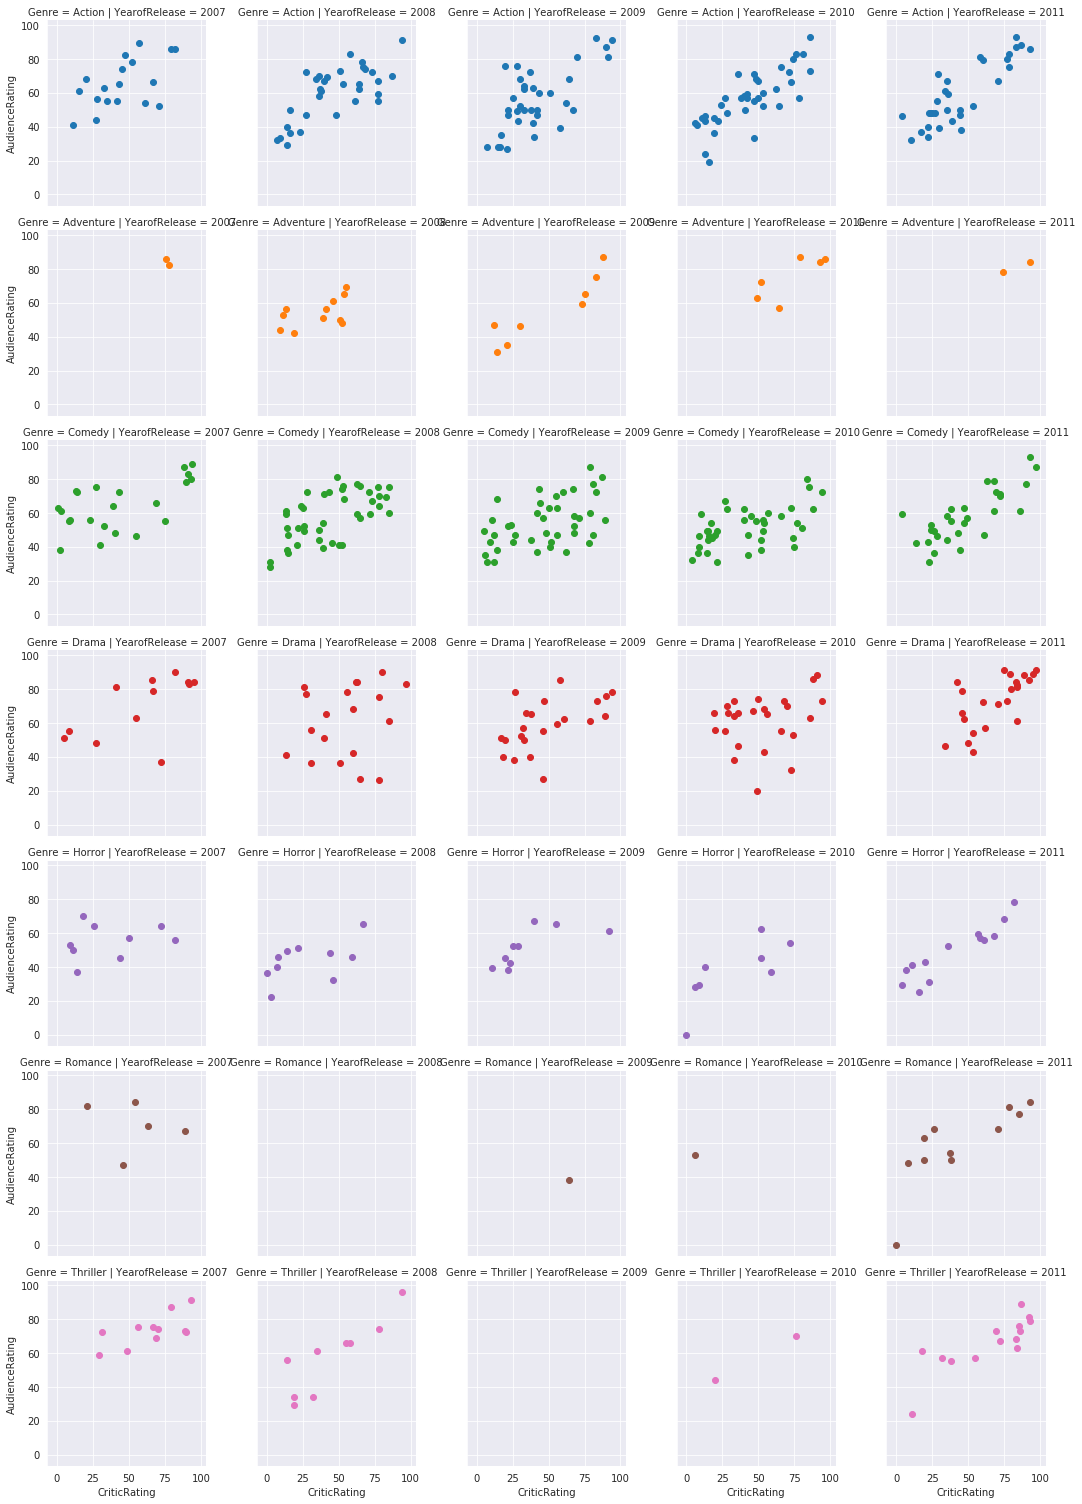

In [35]:
#Populating the facetgrid with a scatter plot
g = sns.FacetGrid(movies, row='Genre', col='YearofRelease', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')


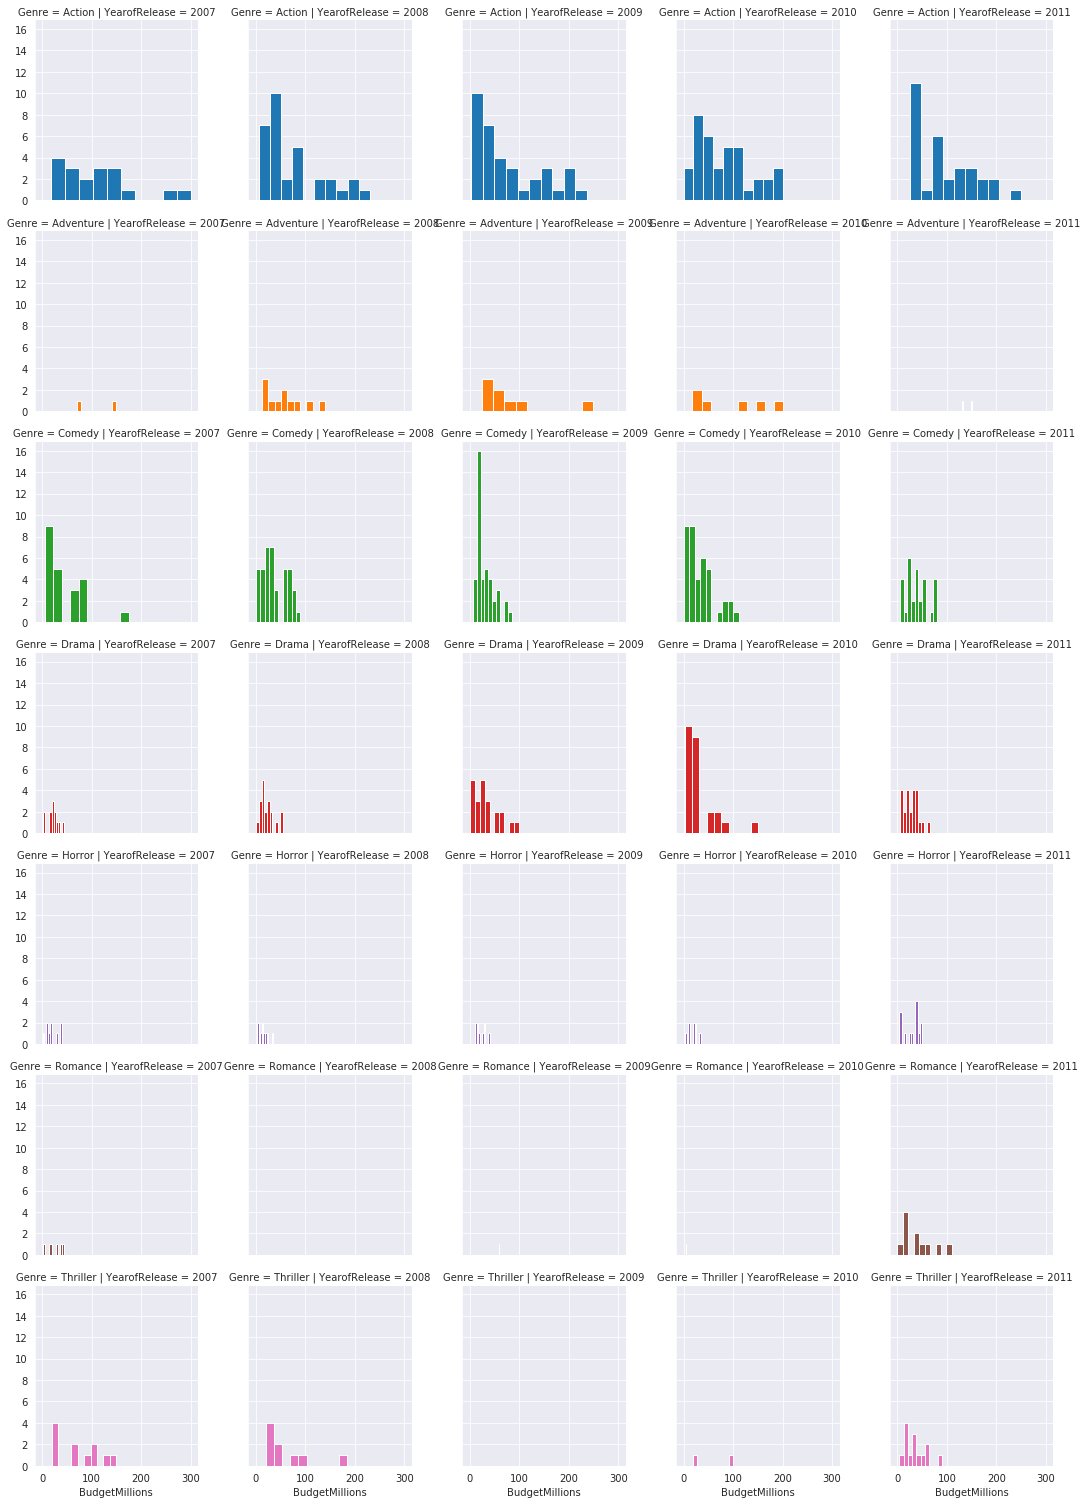

In [36]:
#Populating the facetgrid with a histogram
g = sns.FacetGrid(movies, row='Genre', col='YearofRelease', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

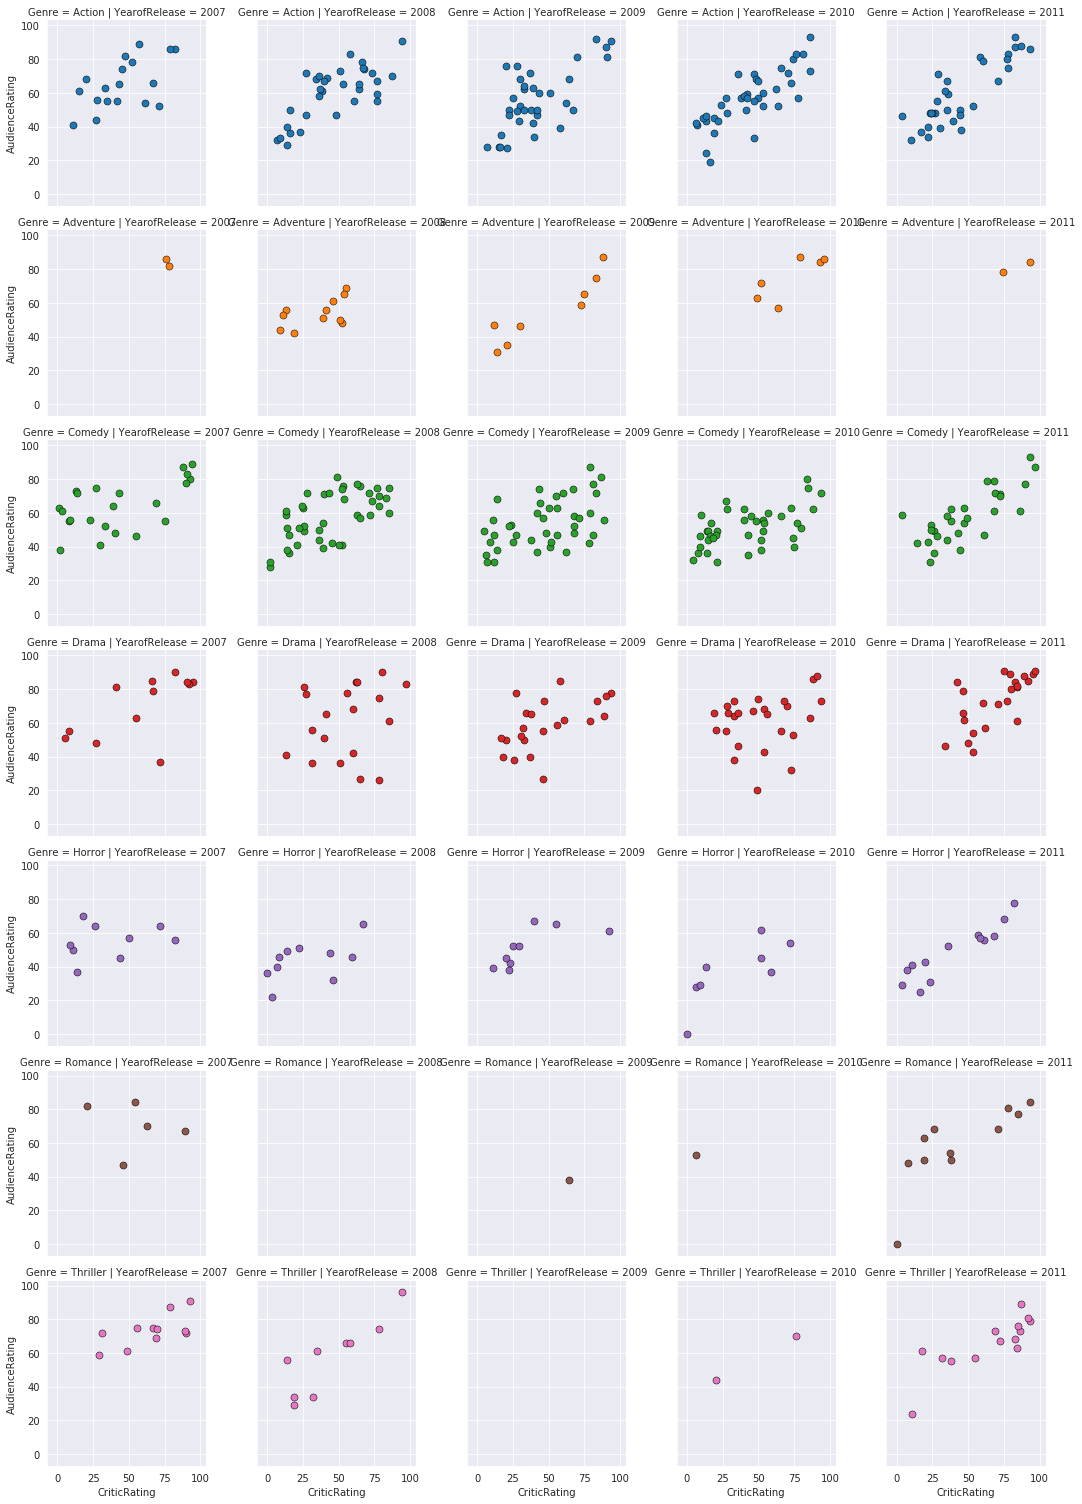

In [37]:
#Populating the facetgrid with a scatter plot - Modified
g = sns.FacetGrid(movies, row='Genre', col='YearofRelease', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

---

## Coordinates and  Diagonals

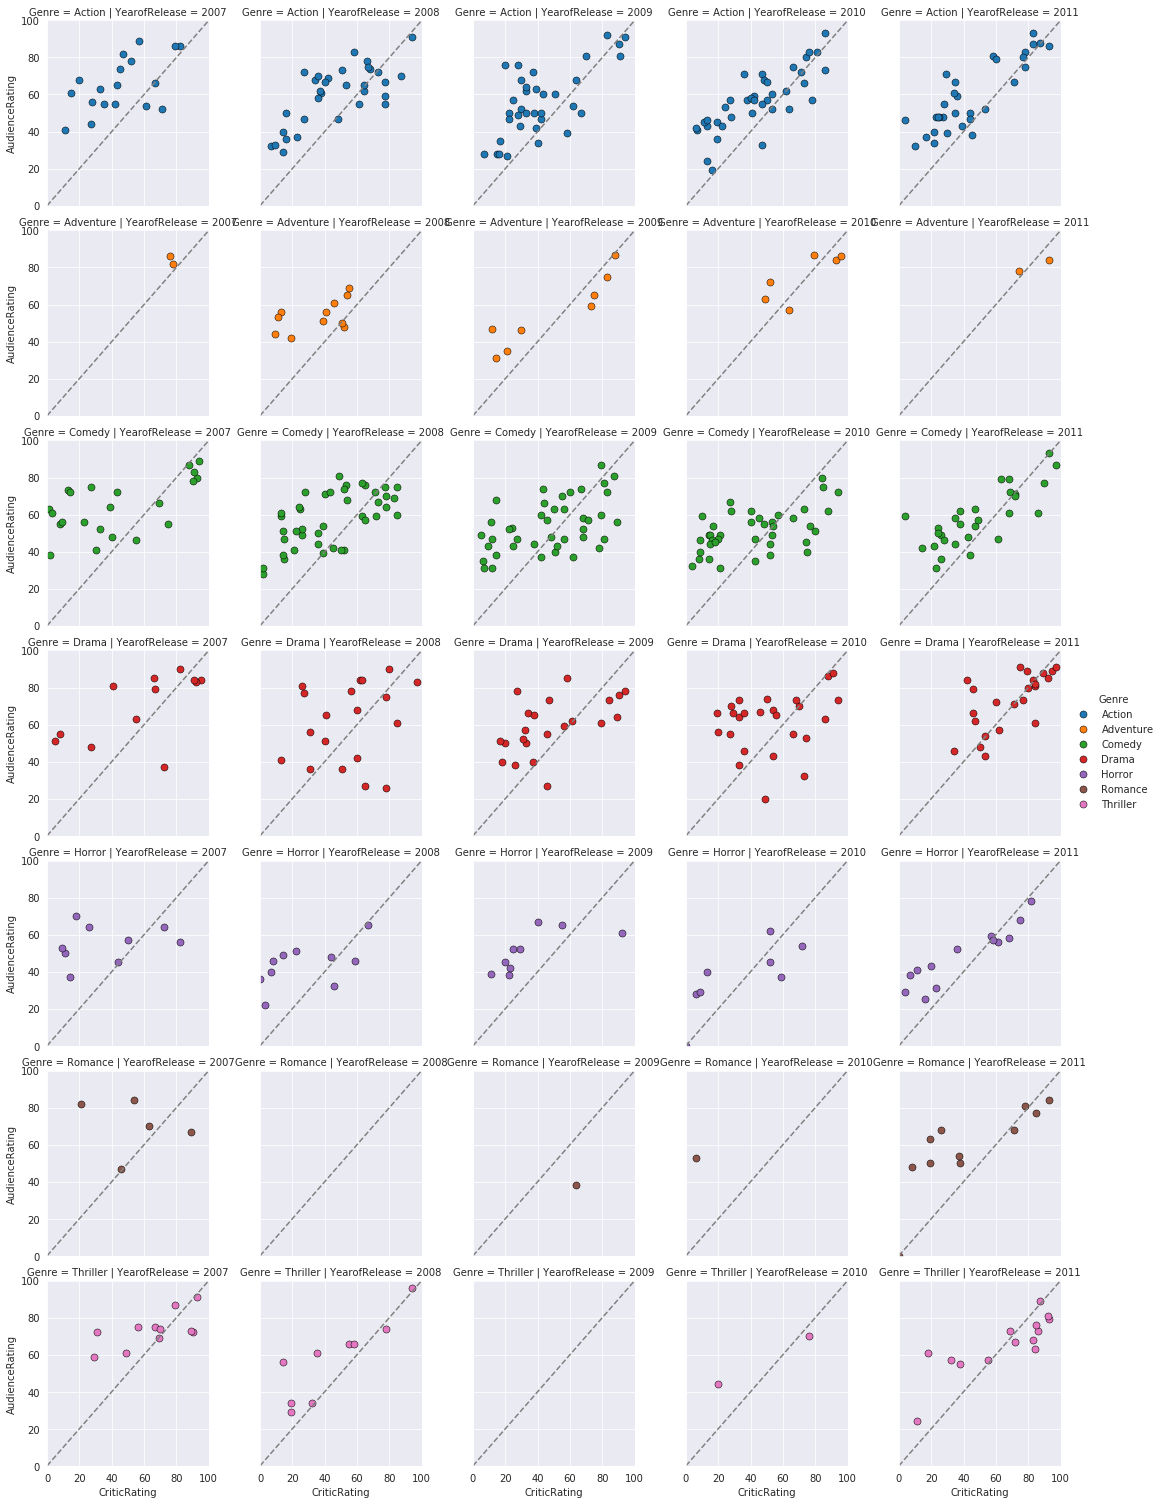

In [38]:
#Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='YearofRelease', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
#Adding diagonal
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')
#Adding legend
g.add_legend()

---

## Building Dashboards in Python

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

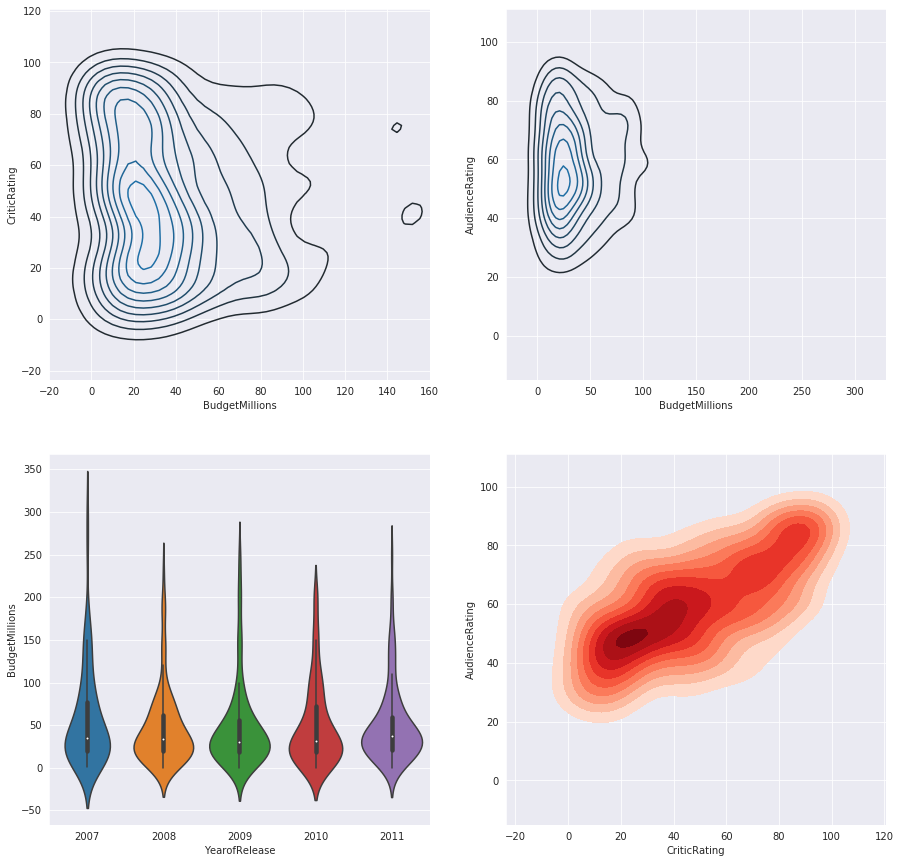

In [62]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,0])
k3 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating,  ax=axes[0,1])
v = sns.violinplot(data=movies, x ='YearofRelease', y='BudgetMillions', ax=axes[1,0])
#axes[1,1].hist(movies.AudienceRating, bins=15)
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k2.set(xlim=(-20,160))
plt.show()

### --Styling the Dashboard

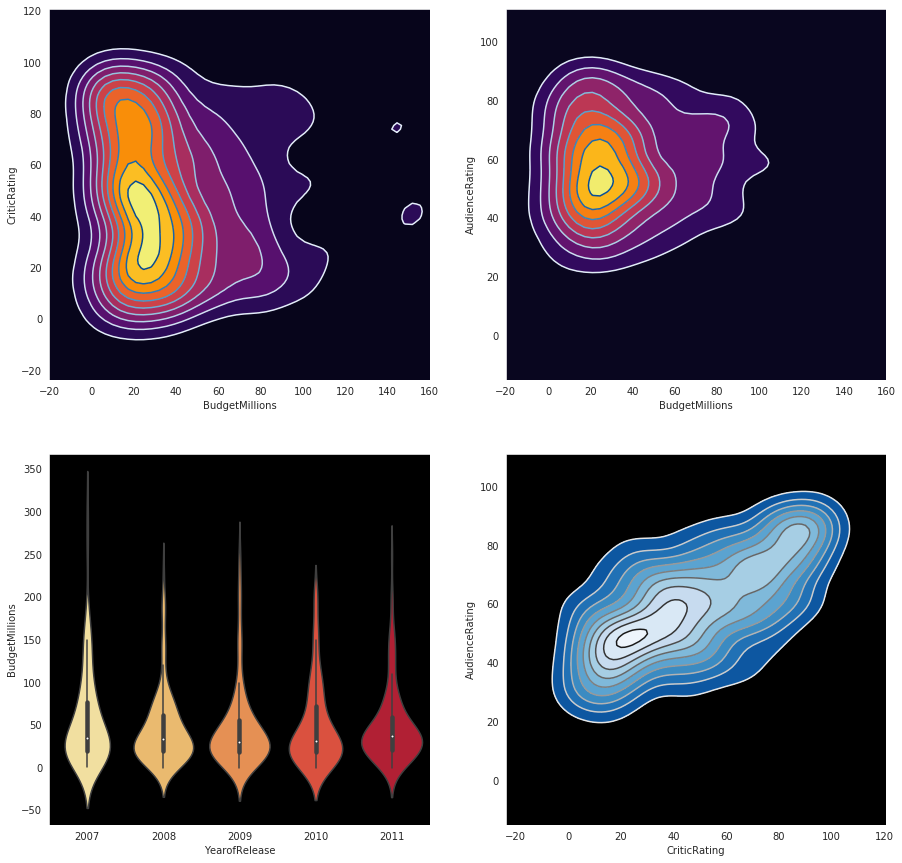

In [63]:
sns.set_style('dark', {"axes.facecolor":"black"}) #white, whitegrid, f=dark, darkgrid, ticks
f, axes = plt.subplots(2,2, figsize=(15,15))
#Plot[0,0]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,shade=True, shade_lowest=True,cmap='inferno', ax=axes[0,0])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='Blues', ax=axes[0,0])
#Plot[0,1]
k3 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=True,cmap='inferno', ax=axes[0,1])
k3b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='Blues', ax=axes[0,1])
#Plot[1,0]
v = sns.violinplot(data=movies, x ='YearofRelease', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')
#axes[1,1].hist(movies.AudienceRating, bins=15)
#Plot[1,1]
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

k2.set(xlim=(-20,160))
k3.set(xlim=(-20,160))
plt.show()


---

### ---Thematic edits

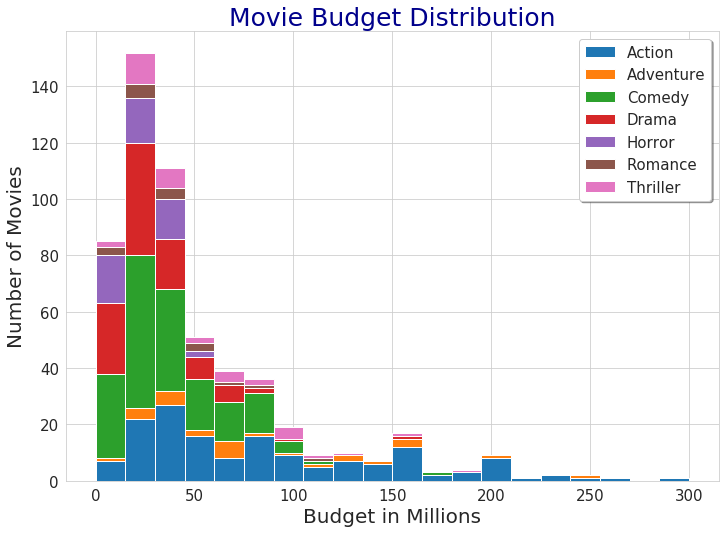

In [82]:
list1 = list() #empty list
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4 paper
    
h = plt.hist(list1, bins=20, stacked=True, rwidth=1, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=25, color="DarkBlue")
plt.ylabel("Number of Movies", fontsize = 20)
plt.xlabel("Budget in Millions", fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(frameon=True, shadow=True, prop={'size':15})
plt.show()